# Sensitivity of soil evaporation

In [1]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

## Partitioning of fluxes

In [3]:
def fluxpartitions(inputfile, startyear, endyear):

    #load data
    data = np.genfromtxt(inputfile, names=True)

    #make numpy arrays in the right units
    esoil = 1000*np.array(data["esoil"]) #mm/d
    etmt = 1000*np.array(data["etmt"])   #mm/d
    etmg = 1000*np.array(data["etmg"])   #mm/d
    assg = np.array(data["assg"])        #mol/m2/d
    asst = np.array(data["asst"])        #mol/m2/d

    #create series of pandas time
    tmod = np.arange(datetime(int(data['fyear'][0]),int(data['fmonth'][0]),int(data['fday'][0])), 
                      datetime(int(data['fyear'][-1]),int(data['fmonth'][-1]),int(data['fday'][-1]))+timedelta(days=1), 
                      timedelta(days=1)).astype(datetime)
                    
    #make pandas series
    esoil_pd = pd.Series(esoil, index=tmod)
    etmt_pd = pd.Series(etmt, index=tmod)
    etmg_pd = pd.Series(etmg, index=tmod)
    assg_pd = pd.Series(assg, index=tmod)
    asst_pd = pd.Series(asst, index=tmod)
                    
    esoil_ma = np.mean(esoil_pd[ (esoil_pd.index.year>=startyear) & (esoil_pd.index.year<=endyear)].resample('A').sum() ) 
    etmt_ma = np.mean(etmt_pd[(etmt_pd.index.year>=startyear) & (etmt_pd.index.year<=endyear)].resample('A').sum() ) 
    etmg_ma = np.mean(etmg_pd[(etmg_pd.index.year>=startyear) & (etmg_pd.index.year<=endyear)].resample('A').sum() ) 
    assg_ma = np.mean(assg_pd[(assg_pd.index.year>=startyear) & (assg_pd.index.year<=endyear)].resample('A').sum() ) 
    asst_ma = np.mean(asst_pd[(asst_pd.index.year>=startyear) & (asst_pd.index.year<=endyear)].resample('A').sum() ) 

    result = [esoil_ma, etmt_ma, etmg_ma, assg_ma, asst_ma]
                    
    return result      
                

In [4]:
def mean_annual_dingo(inputfile, startyear, endyear):

    #load data
    
    data = np.loadtxt(inputfile, usecols=2) #mm/d
    
    #create series of pandas time
    tflux_tmp = np.genfromtxt(inputfile, usecols=0, dtype=np.str )#mm/d
    tflux = pd.date_range(tflux_tmp[0], tflux_tmp[-1], freq='D')
                    
    #make pandas series
    vals_pd = pd.Series(data, index=tflux)                    
    vals_ma = np.mean(vals_pd[ (vals_pd.index.year>=startyear) & (vals_pd.index.year<=endyear)].resample('A').sum() ) 
                    
    return vals_ma      
                

In [5]:
Ea_howard_obs = mean_annual_dingo("../../data/DINGO/Ea_howard.txt", 2002, 2017)
GPP_howard_obs = mean_annual_dingo("../../data/DINGO/GPPdaily_howard.txt", 2002, 2017)* -1.0



In [6]:
#mean annual fluxes for different values transmissivity vegetation cover
ma_howard000 = fluxpartitions("../../data/VOM_output/additional_analyses/sens_esoil/HS_0.00/sce_best/results_daily.txt", 1995, 2015)
ma_howard010 = fluxpartitions("../../data/VOM_output/additional_analyses/sens_esoil/HS_0.10/sce_best/results_daily.txt", 1995, 2015)
ma_howard020 = fluxpartitions("../../data/VOM_output/additional_analyses/sens_esoil/HS_0.20/sce_best/results_daily.txt", 1995, 2015)
ma_howard030 = fluxpartitions("../../data/VOM_output/additional_analyses/sens_esoil/HS_0.30/sce_best/results_daily.txt", 1995, 2015)
ma_howard040 = fluxpartitions("../../data/VOM_output/additional_analyses/sens_esoil/HS_0.40/sce_best/results_daily.txt", 1995, 2015)
ma_howard050 = fluxpartitions("../../data/VOM_output/additional_analyses/sens_esoil/HS_0.50/sce_best/results_daily.txt", 1995, 2015)


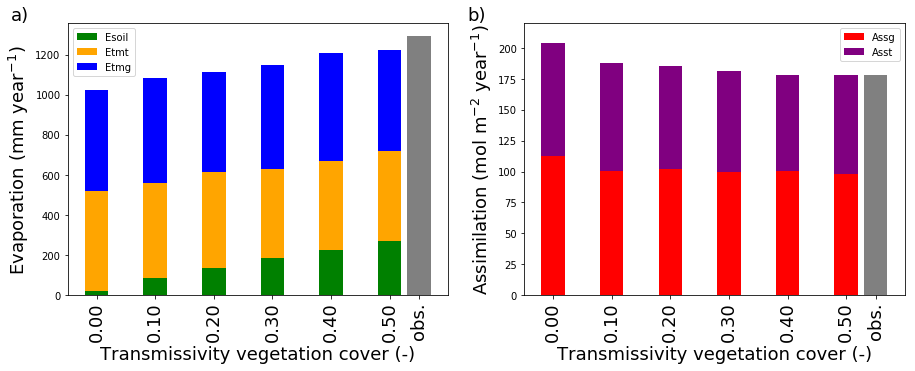

In [7]:

ind = np.arange(0,12, 2)
indlabels = np.append(ind, ind[-1]+1)

labels = ["0.00", "0.10","0.20","0.30","0.40", "0.50", "obs."]

esoil_ma = [ma_howard000[0], ma_howard010[0], ma_howard020[0], ma_howard030[0], ma_howard040[0], ma_howard050[0]]
etmt_ma = [ma_howard000[1], ma_howard010[1], ma_howard020[1], ma_howard030[1], ma_howard040[1], ma_howard050[1]]
etmg_ma = [ma_howard000[2], ma_howard010[2], ma_howard020[2], ma_howard030[2], ma_howard040[2], ma_howard050[2]]
assg_ma = [ma_howard000[3], ma_howard010[3], ma_howard020[3], ma_howard030[3], ma_howard040[3], ma_howard050[3]]
asst_ma = [ma_howard000[4], ma_howard010[4], ma_howard020[4], ma_howard030[4], ma_howard040[4], ma_howard050[4]]

fig, ax   = plt.subplots(nrows=1, ncols=2, figsize=(15, 5) )

p1 = ax[0].bar(ind, esoil_ma, color="green")
p2 = ax[0].bar(ind, etmt_ma, bottom=esoil_ma, color="orange")
p3 = ax[0].bar(ind, etmg_ma, bottom=np.add(etmt_ma,esoil_ma),color="blue")

p4 = ax[0].bar(ind[-1]+1, Ea_howard_obs, color="grey")


ax[0].set_ylabel(r'Evaporation (mm year$^{-}$$^{1}$)', fontsize=18)
ax[0].set_xticks(indlabels) 
ax[0].set_xticklabels( labels,rotation=90, fontsize=18 )
ax[0].legend((p1[0], p2[0], p3[0]), ('Esoil', 'Etmt', 'Etmg'))
ax[0].set_xlabel(r'Transmissivity vegetation cover (-)', fontsize=18)

ax[0].text(-0.15, 1.01, "a)", transform=ax[0].transAxes, 
            size=18)
   
    
p1 = ax[1].bar(ind, assg_ma, color="red")
p2 = ax[1].bar(ind, asst_ma, bottom=assg_ma, color="purple")

p4 = ax[1].bar(ind[-1]+1, GPP_howard_obs, color="grey")

    
ax[1].set_ylabel(r'Assimilation (mol m$^{-2}$ year$^{-1}$)', fontsize=18)
ax[1].set_xlabel(r'Transmissivity vegetation cover (-)', fontsize=18)
ax[1].set_ylim([0,220])

ax[1].set_xticks(indlabels) 
#ax[1].tick_params(axis="x",pad = 50)
ax[1].set_xticklabels( labels,rotation=90, fontsize=18 )
ax[1].legend((p1[0], p2[0]), ('Assg', 'Asst'))

ax[1].text(-0.15, 1.01, "b)", transform=ax[1].transAxes, size=18)

plt.show()

**Figure S9.1.** Partitioning of fluxes for different values of the transmissivity of the vegetation cover for Howard Springs for a) evaporation and b) assimilation. It can be noted that soil evaporation increases, but that transpiration of grasses and trees remains relatively equal. The partitioning for assimilation stays relatively similar for different values of the transmissivity.

## Relative errors mean annual fluxes

<Figure size 1280x400 with 0 Axes>

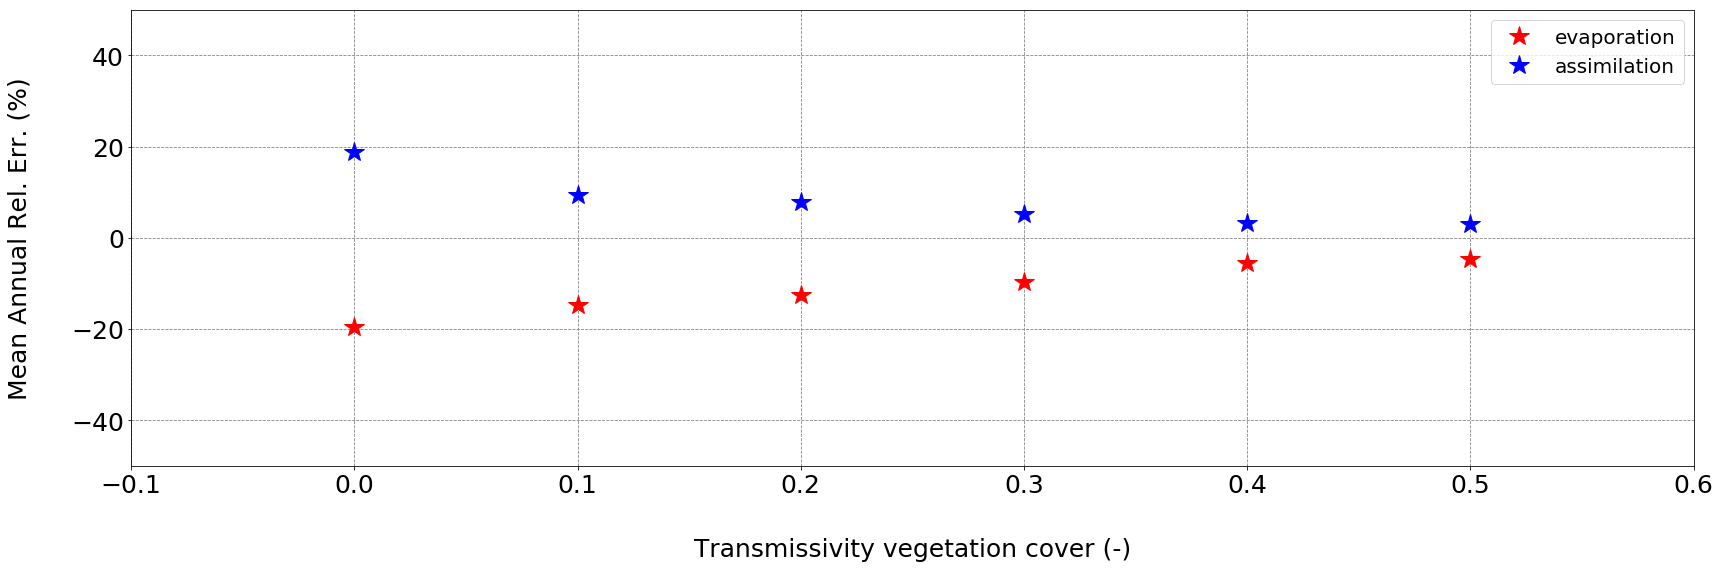

In [8]:
vals = np.arange(0.00, 0.60, 0.10)
labels = map("{:.2f}".format, vals)
labels = list(labels)

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(24, 8), sharex=True, sharey=True)   

i = 0
skipped = 0


loc = 1
#loop over all values 
for label in labels:   

    try:
        ebest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/sens_esoil/HS_" + 
          label + "/sce_stats_best/evap_beststats.txt") #mm/d

        assbest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/sens_esoil/HS_" + 
          label + "/sce_stats_best/ass_beststats.txt") #mm/d       

        if(i == 0):
            box1 = ax.plot(vals[i], ebest_stats[1]*100, '*r', markersize=20, label="evaporation" ) 
            ax.plot(vals[i], assbest_stats[1]*100, '*b', markersize=20, label="assimilation" ) 
        else:
            box1 = ax.plot(vals[i], ebest_stats[1]*100, '*r', markersize=20 ) 
            ax.plot(vals[i], assbest_stats[1]*100, '*b', markersize=20 ) 

    except IOError:
        skipped = skipped + 1 
        print("../../data/VOM_output/additional_analyses/sens_esoil/HS_" + 
          label + "/sce_stats_best/ass_beststats.txt')")
    i = i + 1


ax.set_ylim([-50, 50])    
ax.set_xlim([-0.1, 0.6])    
ax.grid(b=True, which='both', color='grey', axis="both", linestyle='--')

#ax.set_xticks( np.arange(0,1.25, 0.25)  )  
#ax.set_xticks( np.arange(0,1.25, 0.05), minor=True )  

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
plt.xlabel("Transmissivity vegetation cover (-)", size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)

plt.legend(prop={'size': 20})
plt.tight_layout()
plt.show()
    

**Figure S9.2.** The errors between observations from the fluxtowers and modelled mean annual fluxes of evaporation (red) and assimilation (blue) at Howard Springs. The errors seem to decrease for higher values of the transmissivity. 

## Timeseries of evaporation


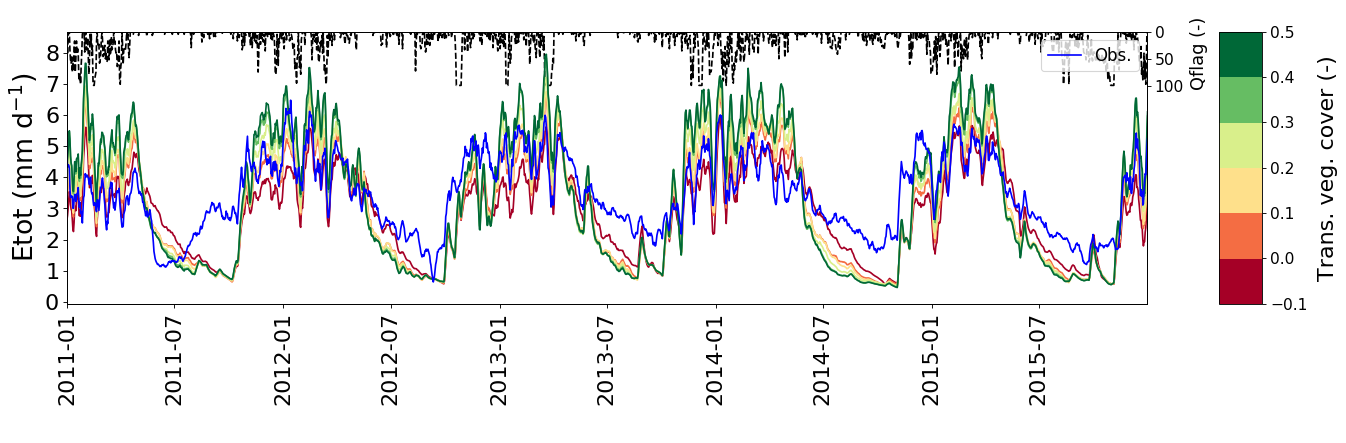

In [9]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_esoil/HS_0.00/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.30/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.40/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.50/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot (mm d$^{-}$$^{1}$)" --plot_cbar True \
--cbar_max 0.5 --cbar_min -0.10 --cblabel "Trans. veg. cover (-)" --labels VOM VOM2 \
--legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
 --palette RdYlGn  --moving_average 7 --figsize 18 4


**Figure S9.3.** The timeseries of total evaporation, smoothed with a moving average of 7 days, for Howard Springs with observations in blue and the results for different values of the transmissivity of the vegetation cover colored from darkred to green. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed.  The different values do not show much difference and the total evaporation stays rather similar.

### Timeseries of soil evaporation

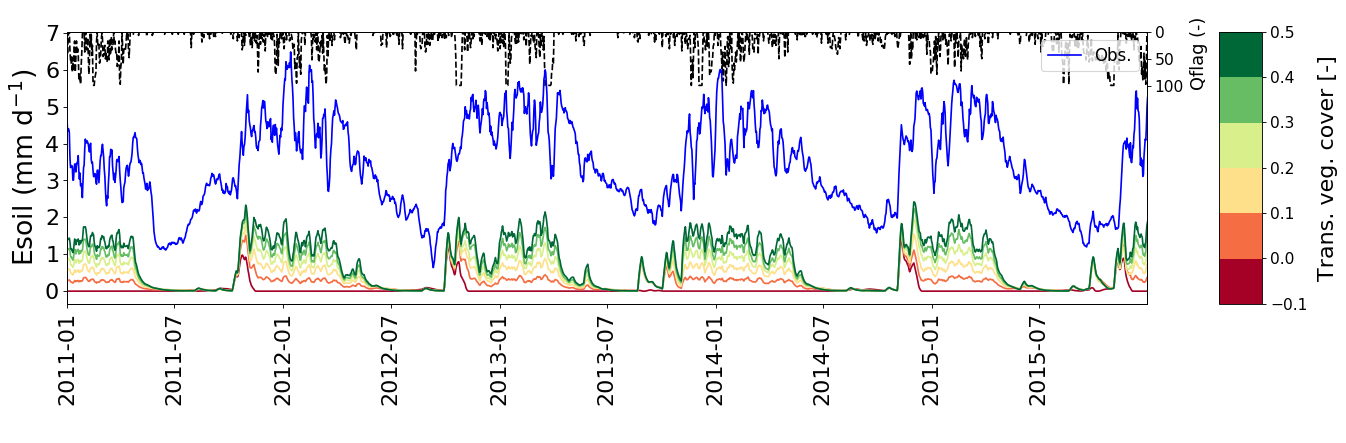

In [10]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_esoil/HS_0.00/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.30/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.40/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.50/sce_best/results_daily.txt \
-v esoil -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Esoil (mm d$^{-}$$^{1}$)" --plot_cbar True \
--cbar_max 0.5 --cbar_min -0.1 --cblabel "Trans. veg. cover [-]" --labels VOM VOM2 \
--legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
 --palette RdYlGn  --moving_average 7 --figsize 18 4


**Figure S9.4.** The timeseries of soil evaporation, smoothed with a moving average of 7 days, for Howard Springs with observations of total evaporation in blue and the results for different values of the transmissivity of the vegetation cover colored from from darkred to green. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The different values of the transmissivity show especially differences during the wet season. 

### Timeseries of grass transpiration

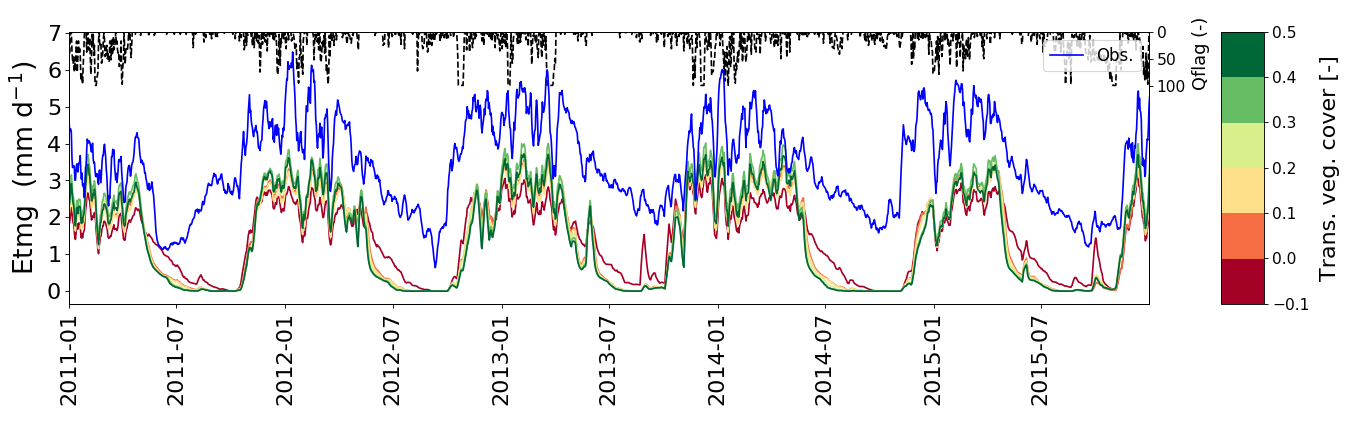

In [11]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_esoil/HS_0.00/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.30/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.40/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.50/sce_best/results_daily.txt \
-v etmg -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etmg  (mm d$^{-}$$^{1}$)" --plot_cbar True \
--cbar_max 0.5 --cbar_min -0.10 --cblabel "Trans. veg. cover [-]" --labels VOM VOM2 \
--legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette RdYlGn  --moving_average 7 --figsize 18 4


**Figure S9.5.** The timeseries of grass transpiration, smoothed with a moving average of 7 days, for Howard Springs with observations of total evaporation in blue and the results for different values of the transmissivity of the vegetation cover colored from darkred to green. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The grass transpiration hardly changes for different values of the transmissivity.

### Timeseries of tree transpiration

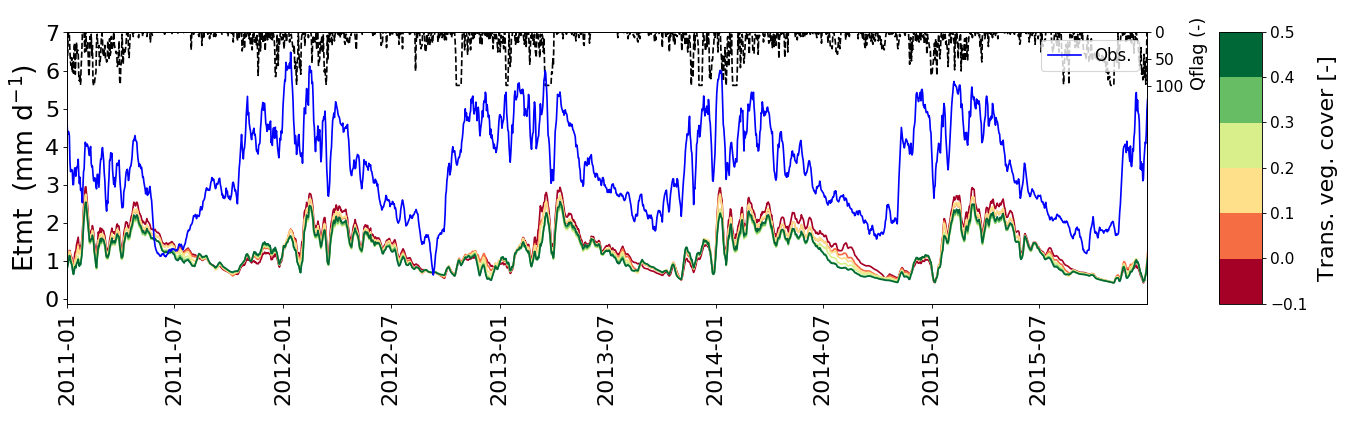

In [12]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_esoil/HS_0.00/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.30/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.40/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.50/sce_best/results_daily.txt \
-v etmt -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etmt  (mm d$^{-}$$^{1}$)" --plot_cbar True \
--cbar_max 0.5 --cbar_min -0.10 --cblabel "Trans. veg. cover [-]" --labels VOM VOM2 \
--legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette RdYlGn  --moving_average 7 --figsize 18 4


**Figure S9.6.** The timeseries of tree transpiration, smoothed with a moving average of 7 days, for Howard Springs with observations of total evaporation in blue and the results for different values of the transmissivity of the vegetation cover colored from darkred to green. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The grass transpiration hardly changes for different values of the transmissivity.

## Timeseries of assimilation


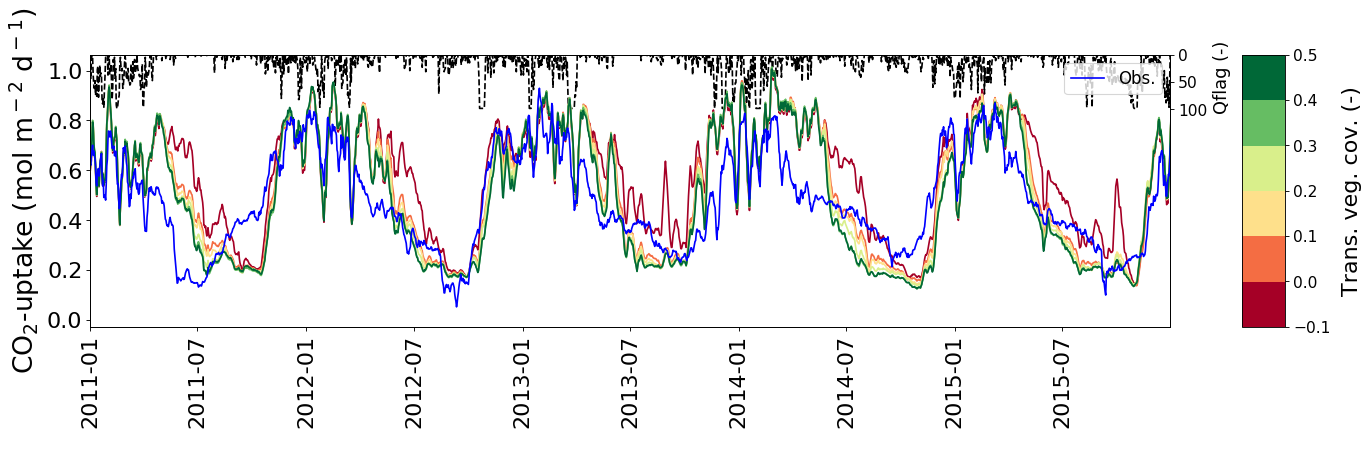

In [13]:

#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_esoil/HS_0.00/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.30/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.40/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.50/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake (mol m$^-$$^2$ d$^-$$^1$)" \
--plot_cbar True --cbar_max 0.5 --cbar_min -0.10 --cblabel "Trans. veg. cov. (-)" --labels VOM VOM2 \
--legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette RdYlGn  --moving_average 7 --figsize 18 4


**Figure S9.7.** The timeseries of total assimilation, smoothed with a moving average of 7 days, for Howard Springs with observations in blue and the results for different values of the transmissivity of the vegetation cover colored from darkred to green. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. Differences are small for the different values of transmissivity.

### Timeseries of assimilation grasses

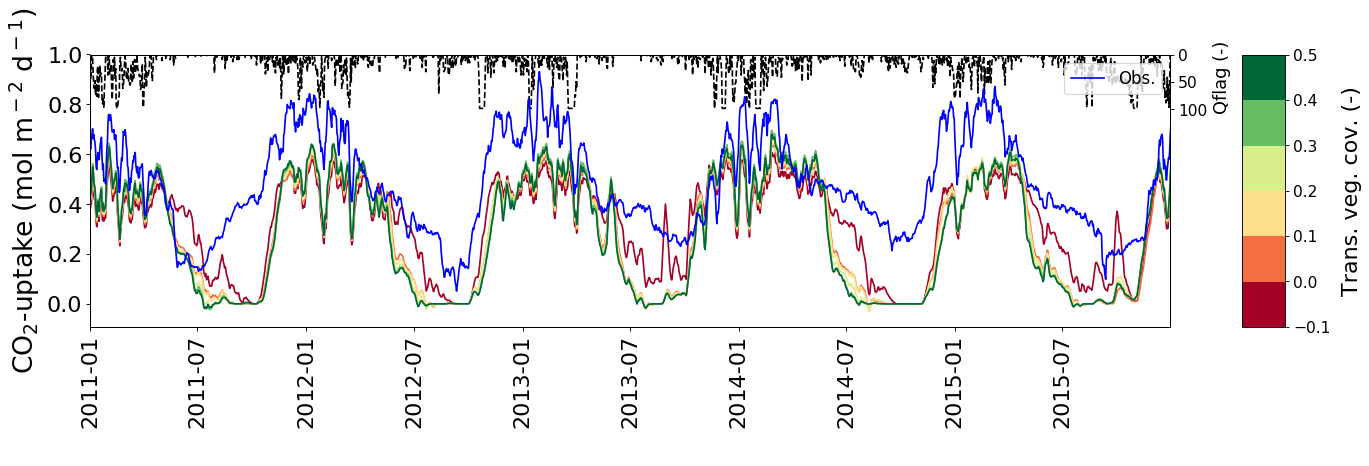

In [14]:

#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_esoil/HS_0.00/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.30/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.40/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.50/sce_best/results_daily.txt \
-v assg -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake (mol m$^-$$^2$ d$^-$$^1$)" \
--plot_cbar True --cbar_max 0.5 --cbar_min -0.10 --cblabel "Trans. veg. cov. (-)" --labels VOM VOM2 \
--legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette RdYlGn  --moving_average 7 --figsize 18 4


**Figure S9.8.** The timeseries of assimilation of grasses for Howard Springs, smoothed with a moving average of 7 days, with observations in blue and the results for different values of the transmissivity of the vegetation cover colored from darkred to green. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. Differences are small for the different values of transmissivity.

### Timeseries of assimilation trees

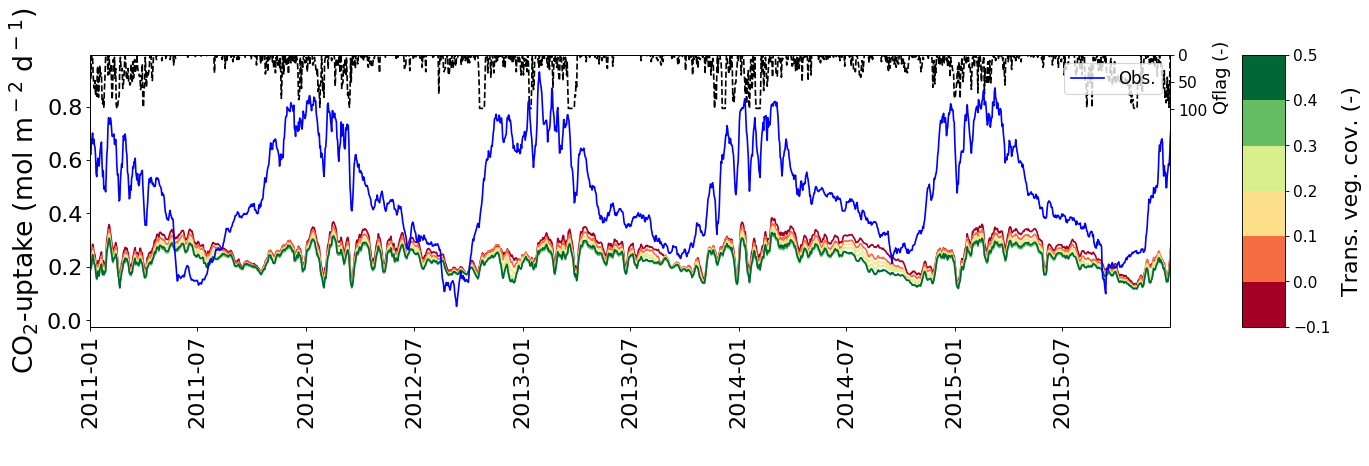

In [15]:

#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_esoil/HS_0.00/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.30/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.40/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_esoil/HS_0.50/sce_best/results_daily.txt \
-v asst -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake (mol m$^-$$^2$ d$^-$$^1$)" \
--plot_cbar True --cbar_max 0.5 --cbar_min -0.10 --cblabel "Trans. veg. cov. (-)" --labels VOM VOM2 \
--legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette RdYlGn  --moving_average 7 --figsize 18 4


**Figure S9.9.** The timeseries of assimilation of trees, smoothed with a moving average of 7 days, for Howard Springs with observations in blue and the results for different values of the transmissivity of the vegetation cover colored from darkred to green. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. Differences are small for the different values of transmissivity.

## Parameter values

<Figure size 1280x400 with 0 Axes>

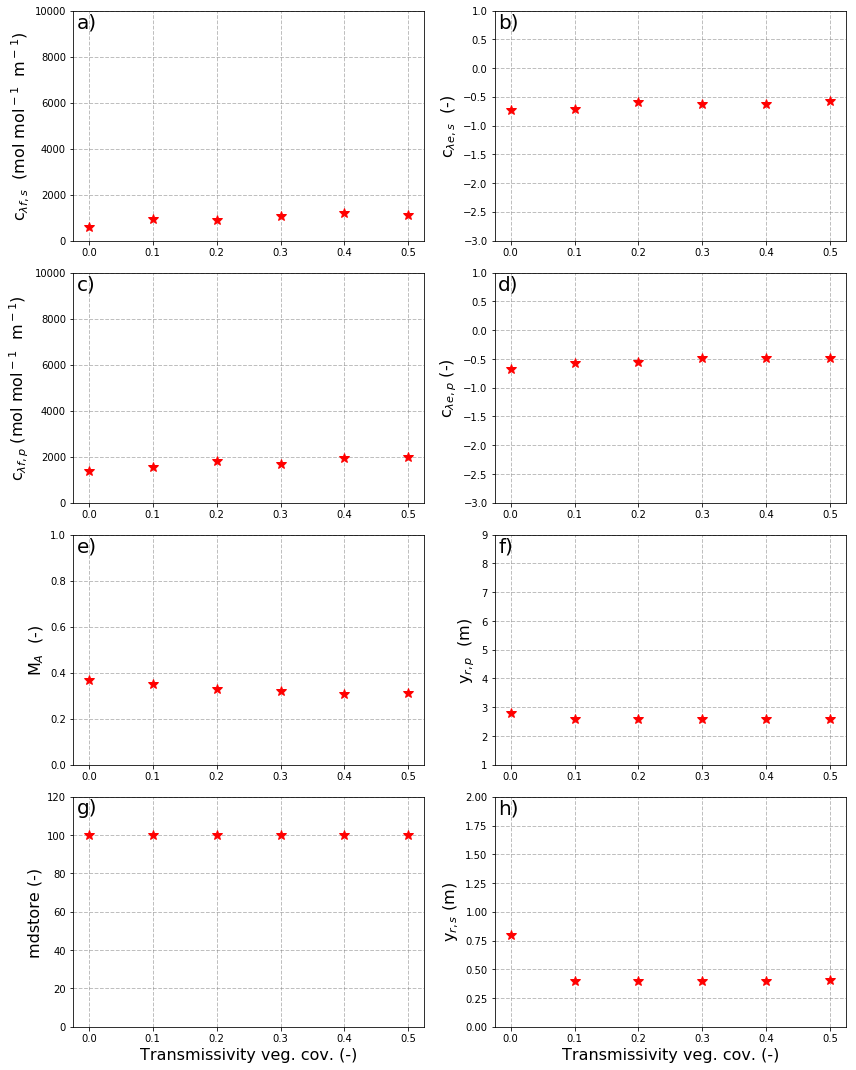

In [16]:
#plot parameters
vals = np.arange(0.00,0.60, 0.10)
vals_str = ["0.00" , "0.10", "0.20", "0.30", "0.40", "0.50"]

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15)) 
ax = axes.flat

skipped = 0
icount = 0
for i_delz in  vals_str:  
    
    try:
        params_tmp = np.loadtxt("../../work/additional_analyses/sens_esoil/HS_" + 
             i_delz + "/best/input/pars.txt")
        for i in range(0,8):
            ax[i].plot(vals[icount], params_tmp[i], 'r*' , markersize=10)

    except IOError:
        skipped = skipped +1
     
    icount = icount + 1 
    

ax[0].set_ylabel(r"c$_{\lambda f,s}$  (mol mol$^-$$^1$  m$^-$$^1$)", size=16 )  
ax[0].set_ylim( 0, 10000  )    
ax[0].text(0.01, 0.95, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
ax[0].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[1].set_ylabel(r"c$_{\lambda e,s}$  (-)", size=16 )  
ax[1].set_ylim( -3, 1  )    
ax[1].text(0.01, 0.95, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)
ax[1].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[2].set_ylabel(r"c$_{\lambda f,p}$ (mol mol$^-$$^1$  m$^-$$^1$)", size=16 )
ax[2].set_ylim( 0, 10000  )    
ax[2].text(0.01, 0.95, "c)", ha='left', va='center', transform=ax[2].transAxes, fontsize=20)
ax[2].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[3].set_ylabel(r"c$_{\lambda e,p}$ (-)", size=16 ) 
ax[3].set_ylim( -3, 1  )    
ax[3].text(0.01, 0.95, "d)", ha='left', va='center', transform=ax[3].transAxes, fontsize=20)
ax[3].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[4].set_ylabel(r"M$_A$  (-)", size=16 )  
ax[4].set_ylim( 0, 1  )    
ax[4].text(0.01, 0.95, "e)", ha='left', va='center', transform=ax[4].transAxes, fontsize=20)
ax[4].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[5].set_ylabel(r"y$_{r,p}$  (m)", size=16 )  
ax[5].set_ylim( 1, 9  )    
ax[5].text(0.01, 0.95, "f)", ha='left', va='center', transform=ax[5].transAxes, fontsize=20)
ax[5].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[6].set_ylabel("mdstore (-)", size=16 )  
ax[6].set_xlabel(r'Transmissivity veg. cov. (-)', size=16 )  
ax[6].set_ylim( 0, 120  )    
ax[6].text(0.01, 0.95, "g)", ha='left', va='center', transform=ax[6].transAxes, fontsize=20)
ax[6].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

ax[7].set_ylabel(r"y$_{r,s}$ (m)", size=16 )  
ax[7].set_xlabel(r'Transmissivity veg. cov. (-)', size=16 )  
ax[7].set_ylim( 0.0, 2  )    
ax[7].text(0.01, 0.95, "h)", ha='left', va='center', transform=ax[7].transAxes, fontsize=20)
ax[7].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)


plt.tight_layout()
    
plt.show()




**Figure S9.10.** Optimal vegetation parameters for different transmissivities of the vegetation cover, for a) and b) the two parameters c$_{\lambda f,s}$ and  c$_{\lambda e,s}$ effecting the water use for perennial vegetation, c) and d) the two parameters c$_{\lambda f,p}$ and c$_{\lambda e,p}$ effecting the water use for seasonal vegetation, e) vegetation cover of the perennial vegetation M$_{A,p}$, f) the rooting depth for the perennial vegetation y$_{r,p}$ and g) the plant water storage (fixed) and h) the rooting depth for the seasonal vegetation y$_{r,s}$. Generally, the parameters are not very sensitive, and stay constant for different values.